In [1]:
def df(x):
    return 8.5 - 20*x + (12 * (x**2)) - (2 * (x**3))

In [2]:
def f(x):
    return (-0.5 * (x**4)) + 4 * (x**3) - 10 * (x**2) + 8.5 * x + 1

In [3]:
def predictor_corrector(f, step, initial_y, initial_x, final_x):
    y = initial_y
    x = initial_x
    y_ls = []
    x_ls = []
    while True:
        x_ls.append(x)
        y_ls.append(y)
        if x == final_x:
            break
        y_i = y + ((f(x) + f(x + step))/2)
        y = y_i
        x = x+step
    return y_ls, x_ls
        
def euler(f, step, initial_y, initial_x, final_x):
    y = initial_y
    x = initial_x
    y_ls = []
    x_ls = []
    while True:
        x_ls.append(x)
        y_ls.append(y)
        if x == final_x:
            break
        y_i = y + ((f(x)))
        y = y_i
        x = x+step
    return y_ls, x_ls
        
def rk4(f, step, initial_y, initial_x, final_x):
    x = initial_x
    y = initial_y
    y_ls = []
    x_ls = []
    while True:
        x_ls.append(x)
        y_ls.append(y)
        if x == final_x:
            break
        k1 = f(x)
        k2 = f(x + (step/2))
        k3 = f(x + (step/2))
        k4 = f(x+step)
        y_i = y + (k1 + 2*k2 + 2*k3 + k4)*(step/6)
        y = y_i
        x = x + step
    return y_ls , x_ls

In [4]:
y1, x1 = predictor_corrector(df, 0.5, 1, 0, 4)
y2, x2 = predictor_corrector(df, 0.25, 1, 0, 4)
y3, x3 = euler(df, 0.5, 1, 0, 4)

In [5]:
y4 , x4 = rk4(df, 0.5, 1, 0, 4)
y5 , x5 = rk4(df, 0.25, 1, 0, 4)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
x_nod = np.linspace(0,4,1000)

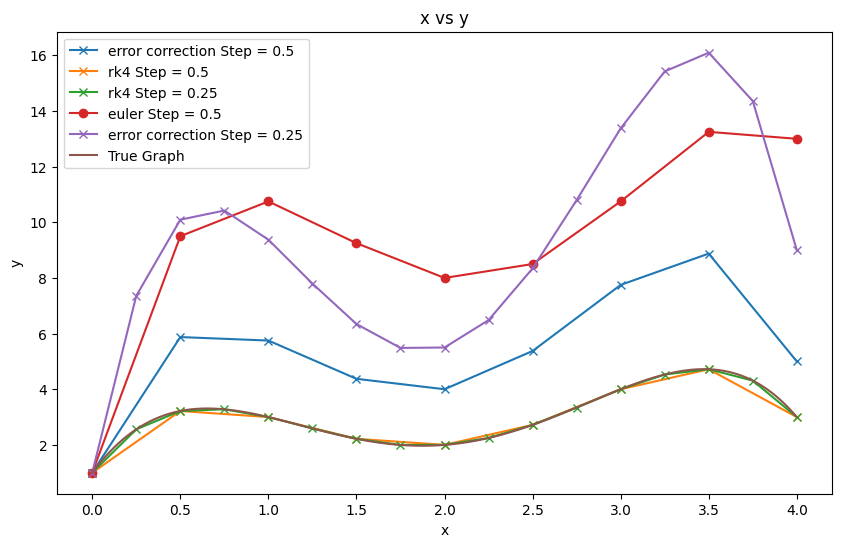

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(x1,y1, label = 'error correction Step = 0.5', marker = 'x')
plt.plot(x4,y4, label = 'rk4 Step = 0.5', marker = 'x')
plt.plot(x5,y5, label = 'rk4 Step = 0.25', marker = 'x')
plt.plot(x3,y3, label = 'euler Step = 0.5', marker = 'o')
plt.plot(x2,y2, label = 'error correction Step = 0.25', marker = 'x')
plt.plot(x_nod, f(x_nod), label = 'True Graph')
plt.ylabel('y')
plt.xlabel('x')
plt.title('x vs y')
plt.legend()
plt.show()

In [9]:
m = 20   
k = 20  
initial_displacement = 1  
initial_velocity = 0   
t_start = 0
t_end = 15
dt = 0.01  # Time step size

# Define the ODE function
def ode_function(x, v, c):
    return -c*v/m - k*x/m

# Implement Predictor-Corrector method
def pre(c):
    t_values = np.arange(t_start, t_end, dt)
    x_values = np.zeros_like(t_values)
    v_values = np.zeros_like(t_values)

    # Initial conditions
    x_values[0] = initial_displacement
    v_values[0] = initial_velocity

    # Predictor-Corrector iterations
    for i in range(1, len(t_values)):
        # Predictor step (Euler's method)
        x_pred = x_values[i-1] + dt * v_values[i-1]
        v_pred = v_values[i-1] + dt * ode_function(x_values[i-1], v_values[i-1], c)

        # Corrector step
        x_values[i] = x_values[i-1] + 0.5 * dt * (v_values[i-1] + v_pred)
        v_values[i] = v_values[i-1] + 0.5 * dt * (ode_function(x_values[i-1], v_values[i-1], c) + ode_function(x_pred, v_pred, c))

    return t_values, x_values

c_values = [5, 40, 200]
plt.figure(figsize=(10, 6))
for c in c_values:
    t, x = pre(c)
    plt.plot(t, x, label=f'c={c}')

plt.title('Displacement vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.legend()
plt.grid(True)
plt.show()


TypeError: ode_function() missing 2 required positional arguments: 'v' and 'c'

<Figure size 1000x600 with 0 Axes>

In [10]:
# y = initial_y
#     x = initial_x
#     y_ls = []
#     x_ls = []
#     while True:
#         x_ls.append(x)
#         y_ls.append(y)
#         if x == final_x:
#             break
#         y_i = y + ((f(x) + f(x + step))/2)
#         y = y_i
#         x = x+step
#     return y_ls, x_ls
def dv(c, v, x):
    return -(20*x + c * v )/20    

In [ ]:
def predictor_corrector_ques2(f, step, c, initial_y, initial_v, final_v):
    y = initial_y
    v = initial_v
    y_ls = []
    v_ls = []
    while True:
        v_ls.append(v)
        y_ls.append(y) 
        if x == final_v:
            break
        y_i = y + ((f(c, v, x) + f((c, v + step), x))/2)
        y = y_i
        v = v+step
    return y_ls, v_ls